<div style="background-color:#769fcd;color:#FFFFFF;padding:20px;">
<h1>Capstone Project - The Battle of the Neighbourhoods - Week 2</h1><a name="contents"></a>
<h3><em>IBM Data Science Professional Certificate - Alex Lynn</em></h3>
</div>

<h2>Table of Contents</h2>
* [1. Introduction](#introduction)
* [2. Data](#data)
* [3. Methodology](#methods)
* [4. Analysis](#analysis)
* [5. Results](#results)
* [6. Discussion](#discussion)
* [7. Concolusion](#conclusion)
* [8. Appendix](#appendix)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>1. Introduction</h2><a name="introduction"></a>
</div>

This research is intended on finding the best suitable location for a **Peruvian** restaurant in the city of **Cambridge, UK**. The report is designed for any stakeholder who would like to make a calculated risk before leasing a retail space.

The main criteria for this report are to find a location that is close to an area where there is a good choice of entertainment, but where there are not any restaurants that provide similar cuisine type (e.g. **Mexican, Brazilian** etc).

**Cambridge** is a city with a big demographic of tourists and foreign students, so appealing to a type of cuisine that does not exist in the market could prove profitable for the stakeholder.

As of current statistics these are the **5** most popular restaurant cuisines in the **UK**, so there is a gap in the market for emerging food trends. The report will look to examine whether Cambridge fits into the same generalised food choice as the rest of the UK.
<ol>
    <li>Pub Food</li>
    <li>English</li>
    <li>Chinese</li>
    <li>Indian</li>
    <li>Italian</li>
</ol>

> <small>Appendix: 1.1</small>
> <a href="https://beambox.com/townsquare/what-are-the-most-popular-types-of-restaurants-in-the-uk">What are the most popular types of restaurants in the UK</a><br>
> <cite>Beambox.com</cite>

[Back to Contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>2. Data</h2><a name="data"></a>
</div>

In this report we will look to get the following information from our data.

* Locate any restaurants within the City that already serve **Latin American** food.
    * Restaurant information will be stored for use in further analysis.
    * The stakeholder has said that a 1km radius is required from any existing **Latin American** restaurant.
* Research the demographic of restaurant types within **Cambridge**, listing the top 10 categories.
    * The stakeholder expects that the market is dominated by **Italian** restaurants.
* Divide the city of **Cambridge** into smaller areas using a list of boroughs. 
    * Show the frequency of the top 10 categories within each borough.
    * Showing the frequency of entertainment venues (e.g. Theatres, Cinemas, Bars etc)
* Display on a Map the clustering of the different areas within **Cambridge** and which areas are similar.
    * Showing any existing ** Latin American** restauraunts.

To create this report the methods used will be:

* *Geolocater* to provide the centre point of **Cambridge, UK**.
* *Web Scraping* of **Cambridge** districts.
    * Data gathered to get the Geo points for each district.
    * Data will be used to create a Choropleth Map depicting the frequencies within these areas.
    > <small>Appendix: 2.1</small>
    > <a href="https://wiki.openstreetmap.org/wiki/Cambridge">Cambridge</a><br>
    > <cite>OpenStreetMap.org</cite>
* *FourSquare API* will return lists of venues using the co-ordinates for each district.
    * It will also return the latitude and longitude for each venue.
    * Using specific venue types will return the data requied
    

[Back to Contents](#contents)

#### Import Statement

<table align="left">
    <thead>
        <th>Library</th>
        <th>Reason</th>
    </thead>
    <tbody>
        <tr>
            <td>**Folium**</td>
            <td>Mapping library, to create accurate map visualisations</td>
        </tr>
        <tr>
            <td>**Pandas**</td>
            <td>Data Analysis library, to create DataFrames and process data.</td>
        </tr>
        <tr>
            <td>**Matplotlib**</td>
            <td>Plotting library, to show visualisations of the data.</td>
        </tr>
        <tr>
            <td>**Seaborn**</td>
            <td>Plotting library, works on top of Matplotlib.</td>
        </tr>
        <tr>
            <td>**urllib.request**</td>
            <td>URL request library, to make web requests.</td>
        </tr>
        <tr>
            <td>**bs4**</td>
            <td>BeautifulSoup library, to scrape the data from web requests.</td>
        </tr>
        <tr>
            <td>**geocoder**</td>
            <td>GeoCoder library, to get the latitude and longitude using an address.</td>
        </tr>
        <tr>
            <td>**Numpy**</td>
            <td>Scientific library, we will be using it for Arrays.</td>
        </tr>
        <tr>
            <td>JSON</td>
            <td>JSON library, used to load and parse JSON files.</td>
        </tr>
        <tr>
            <td>Requests</td>
            <td>Web Requests library, to access websites and parse HTML</td>
        </tr>
    </tbody>
</table>

In [1]:
# Import Statements
import folium
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline 

import seaborn as sns
import urllib.request
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim

import numpy as np
import json
import requests

### Data Retrieval
<a id="dataretrieval"></a>

To start we need to scrape the data from the <a href="https://wiki.openstreetmap.org/wiki/Cambridge">website</a> to get all of our districts which will be used with our .geojson file.<br>
This will be done using `urllib.request` which will request the URL from the site, then we will use `bs4` to collect the information from the request and put it into a DataFrame

In [2]:
# Request the webpage of the following URL
url = 'https://wiki.openstreetmap.org/wiki/Cambridge'
data_raw = urllib.request.urlopen(url).read()

In [3]:
# Prettify the request
soup = BeautifulSoup(data_raw, 'lxml')

##### Get all data from the website into an array

In [4]:
# Initiate the arrays
district = []
location = []

# Get the 4th table from the webpage
tables = soup.findAll("table")[3]

# Get all <tr> references from the table
rows = tables.findAll("tr")

# For each row in <tr>
for row in rows:
    i = 0
    cells = row.findAll("td")
    for cell in cells:
        if i == 0:
            district.append(cell.text)
        elif i == 1:
            number = cell.find("span", title="browse relation").text
            location.append(number)
        
        i = i + 1

##### Combine Arrays into DataFrame

In [5]:
df_district = pd.DataFrame(district,columns=['District'])
df_district['Location'] = location

print('Shape:',df_district.shape)
df_district.head()

Shape: (14, 2)


,District,Location
0,Abbey,1736010
1,Arbury,1736011
2,Castle,1736012
3,Cherry Hinton,1736013
4,Coleridge,1736014


##### Load the GeoJson file

* GeoJson file that made using the location boundary information from the webiste listed above.
* Json data collected from <a href="http://polygons.openstreetmap.fr/">website</a>.
* Json data collated into one GeoJson file using Adobe Dreamweaver and following the standard on
<a href="https://en.wikipedia.org/wiki/GeoJSON">Wikipedia</a>.
* Final geojson file tested using <a href="http://geojson.io/">geojson.io</a>

In [6]:
cambridge_geo = r'cambridge.geojson'

##### Get the centroid positions of the geojson areas

In [7]:
# open JSON file 
districtName = []
districtLat = []
districtLon = []

with open(cambridge_geo) as f:
    data = json.load(f)
    coll = data['features']
    
    # Loop through the json file
    for row in coll:
        
        # initiate lat and lon arrays to store the points
        Lat = []
        Lon = []
        
        # setup properties node
        prop = row['properties']
        
        # setup coordinates node
        geometry = row['geometry']
        coord = geometry['coordinates']
        name = ''
        
        # loop through the key, value pairs in properties
        for key, value in prop.items():
            name = value
        
        # loop through the coordinates
        for level1 in coord:
            for level2 in level1:
                for level3 in level2:
                    
                    # convert to string
                    i = str(level3)
                    
                    # replace brackets
                    i = i.replace('[','')
                    i = i.replace(']','')
                    
                    # split using the comma, with maximum of two values in list
                    i = i.split(',',1)
                    
                    # add latitude and longitude to respective arrays
                    Lat.append(i[0])
                    Lon.append(i[1])
                
        # convert arrays to float values
        Lat = np.array(Lat).astype(np.float)
        Lon = np.array(Lon).astype(np.float)
        
        # get the mean latitude and longitude
        LatMean = np.mean(Lat)
        LonMean = np.mean(Lon)
        
        # append top level arrays
        districtName.append(name)
        districtLat.append(LatMean)
        districtLon.append(LonMean)

##### Put arrays into DataFrame

In [8]:
df_coord = pd.DataFrame(districtName,columns=['D_Name'])
df_coord['D_Lon'] = districtLon
df_coord['D_Lat'] = districtLat

df_coord.head()

,D_Name,D_Lon,D_Lat
0,Arbury,52.218995,0.115557
1,Abbey,52.209170,0.158143
2,Castle,52.214867,0.102719
3,Cherry Hinton,52.188377,0.170359
4,Coleridge,52.189603,0.153449


#### Merge the original dataframe and the new dataframe

In [9]:
# Merge df and df_geo
if df_district.shape[1] < 4:
    df_district = pd.merge(left=df_district, right=df_coord, left_on='District', right_on='D_Name')
    df_district.drop(['D_Name','Location'], axis=1, inplace=True)
    df_district.columns = ['District','Latitude','Longitude']
    
df_district.head()

,District,Latitude,Longitude
0,Abbey,52.209170,0.158143
1,Arbury,52.218995,0.115557
2,Castle,52.214867,0.102719
3,Cherry Hinton,52.188377,0.170359
4,Coleridge,52.189603,0.153449


##### Latitude and Longitude of Cambridge using geolocation

This is used to get the location of Cambridge, UK so that we can center our map.

In [10]:
city_name = 'Cambridge, United Kingdom'

geolocator = Nominatim(user_agent="ny_explorer")
city_location = geolocator.geocode(city_name)
city_latitude = city_location.latitude
city_longitude = city_location.longitude
print('Cambridge, UK Coordinates: {}, {}.'.format(city_latitude, city_longitude))

Cambridge, UK Coordinates: 52.2034823, 0.1235817.


#### Setup FourSquare Settings 

These have been removed for the final workbook, replaced by 'X'

In [11]:
CLIENT_ID = 'FNZMAIFEKPJ1VTUXCIHKJYMPAFKA2E55BSUFYAZXHZ5OAUDR'
CLIENT_SECRET = 'UXVK34BOOJI5ZCWWLHQKMGJSIGG2WVROVGWGOI1EXGSUJXLW'
VERSION = '20200727' # Foursquare API version

##### FUNCTION - FourSquare Return

* Using a **search** call on the API so that I can use multiple categories.
* Function takes in the following paramaters:
    * Names (Array)
    * Latitudes (Array)
    * Lonitudes (Array)
    * Radius (in metres) - <em>Default 500</em>
    * Limit - <em>Default 100</em>
    * Category - <em>Default ''</em>
* <strong>Returns DataFrame</strong>

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100,category=''):    
    
    '''
    Use this function to return a dataframe with all the venues within your criteria.
    RETURNS:
        DataFrame with [District],[Venue],[Venue Latitude],[Venue Longitude],[Venue Category]
    '''
    
    venues_list=[]

    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT,category)
                        
        # make the GET request
        results = requests.get(url).json()["response"]['venues']
        #print(results)
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],
            v['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = [
                  'District', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
        
    return(nearby_venues) 

##### FUNCTION - DataFrame of restaurants in the districts

* Function will return a dataframe to be used to show frequency of restaurants.

In [13]:
def getVenues():

    radius = 500
    LIMIT = 500
    category = '4d4b7105d754a06374d81259'

    df = getNearbyVenues(df_district['District'],
                            df_district['Latitude'],
                            df_district['Longitude'],
                            radius,
                            LIMIT,
                            category)
    return df

In [14]:
district_venues = getVenues()
print('Shape: ',district_venues.shape)
district_venues.head()

Shape:  (187, 5)


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey,Autumn House Bed and Breakfast Cambridge,52.212496,0.158485,Gastropub
1,Abbey,Pipasha,52.213388,0.154665,Indian Restaurant
2,Abbey,The Codfather,52.211820,0.163236,Fish & Chips Shop
3,Abbey,China Chef,52.213499,0.154384,Chinese Restaurant
4,Arbury,Coffee Tree,52.219494,0.111630,Café


###### Results
As we can see there are only **187 restaurants** listed on FourSquare taken in districts that we have listed, within a 500m radius of the centroid position of the district.

##### FUNCTION - DataFrame of entertainment in the districts

* Function will return a dataframe to be used to show frequency of entertainment.

In [15]:
def getEntertainment():
    radius = 500
    LIMIT = 500
    category = '4d4b7105d754a06376d81259,4d4b7104d754a06370d81259'

    # Categories set to Arts & Entertainment and Nightlife Spots

    df = getNearbyVenues(df_district['District'],
                                  df_district['Latitude'],
                                  df_district['Longitude'],
                                  radius,
                                  LIMIT,
                                  category)
    return df

In [16]:
district_entertain = getEntertainment()
print('Shape: ',district_entertain.shape)
district_entertain.head()

Shape:  (160, 5)


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey,Dion Dublin Suite,52.212271,0.155038,Bar
1,Abbey,Abbey Stadium,52.212570,0.154379,Soccer Stadium
2,Abbey,Splash Pad,52.209740,0.154114,Water Park
3,Abbey,Mulletboy Studios,52.212644,0.153579,Music Venue
4,Arbury,Colours of Dance,52.219164,0.111665,Dance Studio


###### Results
As we can see there are only **160 Arts & Entertainment or Nightlife spots** listed on FourSquare for the districts that we have listed, within a 500m radius of the centroid position of the district.

##### FUNCTION - DataFrame of Latin American restaurants in the districts

* Function will return a dataframe to be used to show frequency of Latin American restaurants.

In [17]:
def getLatin():
    radius = 500
    LIMIT = 500
    category = '4bf58dd8d48988d1be941735'

    data = {'Location':['Cambridge'],'Latitude':[city_latitude],'Longitude':[city_longitude]}
    df_cambridge = pd.DataFrame (data, columns = ['Location','Latitude','Longitude'])
    # Categories set to Latin American restaurants

    df = getNearbyVenues(df_cambridge['Location'],
            df_cambridge['Latitude'],
            df_cambridge['Longitude'],
            5000,
            LIMIT,
            category)
    
    #df_cambridge
    return df

In [18]:
district_latin = getLatin()
print('Shape: ',district_latin.shape)
district_latin.head()

Shape:  (5, 5)


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cambridge,Las Iguanas,52.210230,0.117309,Latin American Restaurant
1,Cambridge,Neide's Deli Café,52.200508,0.135943,Brazilian Restaurant
2,Cambridge,La Latina Bustaurante,52.208076,0.143403,Latin American Restaurant
3,Cambridge,Chicken rush,52.197636,0.144912,Arepa Restaurant
4,Cambridge,Hutter,52.209328,0.144877,South American Restaurant


###### Results
As we can see there are only **1 Latin American restaurant** listed on FourSquare for the districts that we have listed, within a 500m radius of the centroid position of the district.

[Back to Contents](#contents)

### Data Visualisation
<a id="datavisual"></a>

#### Bar Chart showing the frequency of restaurants within districts

* Create a new horizontal bar plot with the districts and the frequency of restaurants

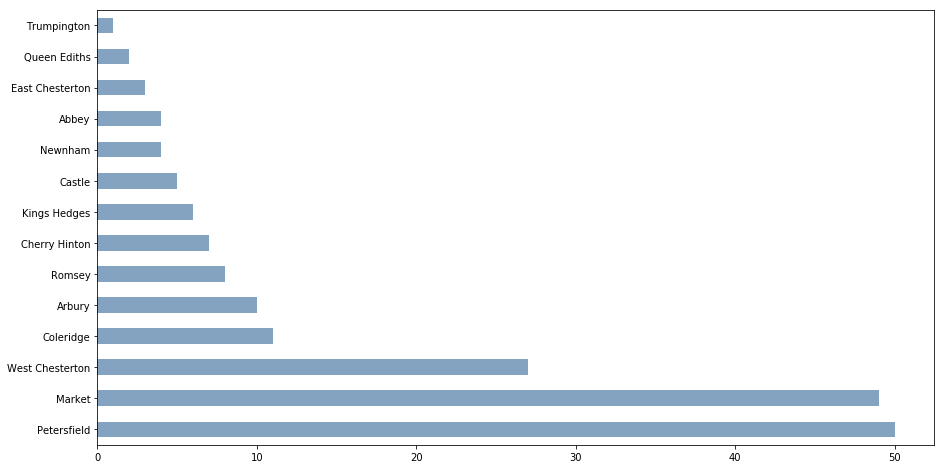

In [19]:
district_venues['District'].value_counts().plot(kind='barh', figsize=(15,8), color=(0.2, 0.4, 0.6, 0.6))

**From this bar plot we can see that the most populous areas for restaurants are Petersfield, Market and West Chesterton.**

#### Show map of Cambridge with districts

* Map shows markers using district latitude and longitude
* Radius is drawn to show the search area that we will be using in Foursquare

In [20]:
# create a map centered on Cambridge
cambridge_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12.5,control_scale=True)

In [21]:
# Function loop through districts and add marker using lat and lon
def addMarkers(m):

    for lat, lng, name in zip(df_district.Latitude, df_district.Longitude, df_district.District):
        location = np.array([lat,lng])
        # Add Marker
        folium.Marker(location, popup='<i>{}</i>'.format(name), tooltip=name).add_to(m)
        # Add Radius of 500m
        folium.Circle(
            location=location,
            radius=500,
            color='#3186cc',
            fill=True,
            fill_color='#3186cc'
        ).add_to(m)
    
    display(m)

In [22]:
addMarkers(cambridge_map)

#### Radius Decision
Through testing the appropriate radius 500m has been set as the threshold of the FourSquare search radius, so it doesn't overlap into another district.
In this map, we can see that the following districts centroids taken from the mean of the geolocation are not that accurate:
* Trumpington
* Newnham
* Romsey
* Cherry Hinton

This is due to a large amount of their boundary being located in rural areas.

Therfore the centroid location must be repositioned. In the following map I have set the map to show when clicked the latitude and longitude, meaning I can locate more accurate postions.

In [23]:
# Create Map with latLng Popup
cambridge_map.add_child(folium.LatLngPopup())
display(cambridge_map)

Updated locations:

* **Trumpington**
    * Lat: 52.1734
    * Lng: 0.1131
* **Newnham**
    * Lat: 52.1970
    * Lng: 0.1068
    
* **Romsey**
    * Lat: 52.1972
    * Lng: 0.1463

* **Cherry Hinton**
    * Lat: 52.1872
    * Lng: 0.1764
    
* **Abbey**
    * Lat: 52.2124
    * Lng: 0.1613
    
Let's update the district dataframe.

In [24]:
# Update Trumpington
df_district.loc[df_district.District == 'Trumpington', 'Latitude'] = 52.1734
df_district.loc[df_district.District == 'Trumpington', 'Longitude'] = 0.1131

# Update Newnham
df_district.loc[df_district.District == 'Newnham', 'Latitude'] = 52.1970
df_district.loc[df_district.District == 'Newnham', 'Longitude'] =  0.1068

# Update Romsey
df_district.loc[df_district.District == 'Romsey', 'Latitude'] = 52.1972
df_district.loc[df_district.District == 'Romsey', 'Longitude'] =  0.1463

# Update Cherry Hinton
df_district.loc[df_district.District == 'Cherry Hinton', 'Latitude'] = 52.1872
df_district.loc[df_district.District == 'Cherry Hinton', 'Longitude'] =  0.1764

# Update Abbey
df_district.loc[df_district.District == 'Abbey', 'Latitude'] = 52.2124
df_district.loc[df_district.District == 'Abbey', 'Longitude'] =  0.1613


In [25]:
# create a map centered on Cambridge
cambridge_map_ref = folium.Map(location=[city_latitude, city_longitude], zoom_start=12.5,control_scale=True)
addMarkers(cambridge_map_ref)

#### Iterate the data retrieval process

In [26]:
district_venues_update = getVenues()
district_entertain_update = getEntertainment()
district_latin_update  = getLatin()

print('Original Venue: ',district_venues.shape[0],'Updated Venue: ',district_venues_update.shape[0])
print('Original Ent: ',district_entertain.shape[0],'Updated Ent: ',district_entertain_update.shape[0])
print('Original Latin: ',district_latin.shape[0],'Updated Latin: ',district_latin_update.shape[0])

Original Venue:  187 Updated Venue:  226
Original Ent:  160 Updated Ent:  179
Original Latin:  5 Updated Latin:  5


#### Repeat - Bar Chart showing the frequency of restaurants within districts

* Create a new horizontal bar plot with the districts and the frequency of restaurants

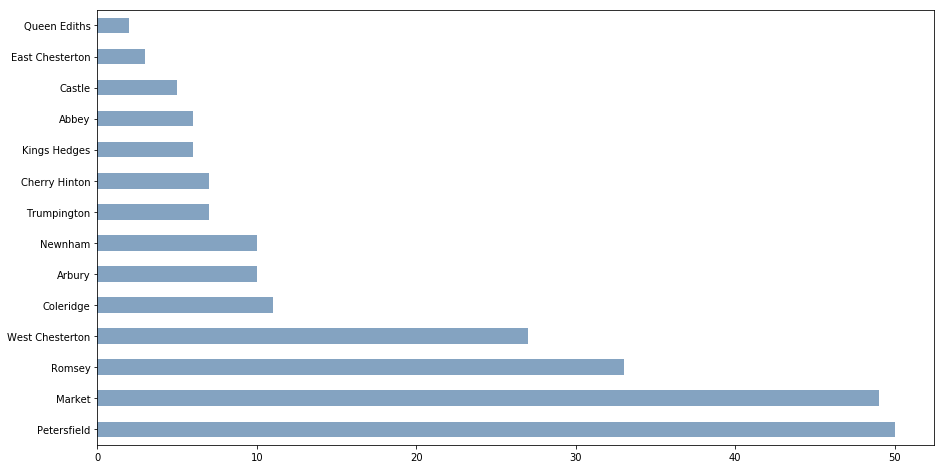

In [27]:
district_venues_update['District'].value_counts().plot(kind='barh', figsize=(15,8), color=(0.2, 0.4, 0.6, 0.6))

In this chart, we can now see how Trumpington, Newnham and Romsey have moved forward in the frequency bar plot.

#### Details Map

Let's a make a map to display the following:
* Chloropeth Map showing the frequency of restaurants in the districts.
* Cluster markers to show density

In [28]:
# Create a DataFrame to hold the district names and count
district_count = pd.DataFrame(district_venues_update['District'].value_counts())
district_count.reset_index(inplace=True)
district_count.columns = ['District','Count']

In [29]:
from folium import plugins

cambridge_geo = r'Cambridge.geojson' # geojson file

# Initiate a map
cambridge_ch_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

# Add Choropleth Map
folium.Choropleth(
    geo_data=cambridge_geo,
    name='choropleth',
    data=district_count,
    columns=['District','Count'],
    key_on='feature.properties.Name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Restaurant Frequency'
).add_to(cambridge_ch_map)


# initiate a mark cluster object for the restaurants in the dataframe
restaurants_cluster = plugins.MarkerCluster().add_to(cambridge_ch_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(district_venues_update['Venue Latitude'], district_venues_update['Venue Longitude'], district_venues_update['Venue']):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        tooltip=label
    ).add_to(restaurants_cluster)

# Add choropleth item to layer control on the map
folium.LayerControl().add_to(cambridge_ch_map)
    
display(cambridge_ch_map)


From this Choropleth Map we can distinguish that the central areas of Cambridge contain the most restaurants.
* Choropleth and Cluster markers can be turned on an off using the layer control in the top right.

#### Adding existing Latin American restaurants

* Show the current Latin American Restaurants, with a 500m radius.
    * This is the zone where we will not suggest placing the new restaurant.

##### FUNCTION - Create Latin American Restaurant on Map

In [30]:
def addLatin_toMap(m):
    for lat, lng, label, in zip(district_latin_update['Venue Latitude'], district_latin_update['Venue Longitude'], district_latin_update['Venue']):
        location = np.array([lat,lng])
        # Add Marker
        folium.Marker(location, popup='<i>{}</i>'.format(label), tooltip='Latin American Restaurant', icon=folium.Icon(color='red', icon='info-sign')).add_to(m)
        # Add Radius of 500m
        folium.Circle(
                location=location,
                radius=500,
                color='#f54242',
                fill=True,
                fill_color='#f54242'
            ).add_to(m)

##### Create Map

In [31]:
cambridge_latin_map = folium.Map(location=[city_latitude, city_longitude], zoom_start=14)

addLatin_toMap(cambridge_latin_map)
addMarkers(cambridge_latin_map)
    

From the map we can see that the two existing Latin American restaurants are located in **Petersfield** and **Romsey**.
We will therfore exclude these two districts when choosing the location. 
But what areas are similar to these two?
Let us make a cluster of similar areas, we will include **Entertainment** venues in the cluster calculations.

But from looking at this map, we would like to find a location that is **similar** to **Petersfield** and **Romsey** as these have Latin American restaurants that are competing in an enviroment where they are the outliers.

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>3. Methodology</h2><a name="methods"></a>
</div>

Now that we have gathered the data from scraping, and from our geojson file we can start to analyise the results.<br>Data gathered in the **Data</a>** section includes:
* Districts
* Centroid locations for Districts
* DataFrame for **Restaurants** within each District within **500m** of centroid
* DataFrame for **Entertainment** within each District within **500m** of centroid
* DataFrame for **Latin American** restaurants within each District within **500m** of centroid

Our **goal** is to find the districts where there are **no Latin American restaurants** and a **populous nightlife**.

In the **analysis** section we will use the following methods:
* **Clustering** using **K-Means** our districts using the data we have for the restaurants and entertainment venues within the sample that we have taken for each district. The samples consists of all restaurants and entertainment within a 500 metre radius of the centroid location.
* **Scatter Plot** using to show the correlation between restaurant and entertainment venues.
* **Show** that Cambridge fits into the same popular restaurant types as the rest of the UK.
* **DBSCAN Clustering** will be used to find clusters in entertainment venues within a district.

The final product of the research will be to provide an address for each district which is similar to the cluster of **Petersfield** and **Romsey** where there are already successful **Latin American** restaurants. The address will be located in the centre of the entertainment venues and not within **1km** of a competing **Latin American** restaurant.

[Back to Contents](#contents)

<div style="background-color:#769fcd;color:#FFFFFF;padding:15px;">
<h2>4. Analysis</h2><a name="analysis"></a>
</div>

<p>In this section we hope to use our analysis to show suitable locations for the **Peruvian Restaurant**.</p>
<p>To start with we will cluster the districts into similar clusters using **K-Means**.<p>
<p>After that we will see if there is a **correlation** between the frequency of restaurants and entertainment venues.</p>
<p>Following on from that using **DBSCAN** we will find the cluster with the densest entertainment venues within the 3 districts that we have chosen to look into. This will be used later to find the ideal location for the restaurant. The clustering will use the **Latitude and Longitude** of the entertainment venues<p>
<p>Then we will confirm that **Cambridge** does follow the normal trend in most popular restaurants compared to the **UK**.
<p>Lastly the final anaylsis will be to find the ideal locations, we will get the mean of the most popular clusters from the **DBSCAN** step. This will get us a centralised latitude and longitude for the cluster, then we will need to confirm that this is not within a **1km** radius of any other **Latin American** restaurant.</p>

### Does Cambridge follow the same food popularity that the rest of the UK does?

As of current statistics these are the **5** most popular restaurant cuisines in the **UK**
<ol>
    <li>Pub Food</li>
    <li>English</li>
    <li>Chinese</li>
    <li>Indian</li>
    <li>Italian</li>
</ol>

> <small>Appendix: 1.1</small>
> <a href="https://beambox.com/townsquare/what-are-the-most-popular-types-of-restaurants-in-the-uk">What are the most popular types of restaurants in the UK</a><br>
> <cite>Beambox.com</cite>

In [32]:
print('There are {} uniques restaurant categories in Cambridge.'.format(len(district_venues_update['Venue Category'].unique())))

There are 50 uniques restaurant categories in Cambridge.


In [33]:
venue_check = district_venues_update.groupby('Venue Category').count()
venue_check.drop(columns=['Venue','Venue Latitude','Venue Longitude'],inplace=True)
venue_check.reset_index(inplace=True)
venue_check.columns = ['Category','Count']
venue_check.sort_values(by='Count', ascending=False).head(10)

,Category,Count
11,Café,39
27,Indian Restaurant,21
13,Chinese Restaurant,20
14,Coffee Shop,19
5,Bakery,13
20,Fast Food Restaurant,9
36,Restaurant,7
34,Pizza Place,7
25,Gastropub,7
42,Sushi Restaurant,7


Looking at the results of the above table, if we were to remove the following from the list:
* Café
* Coffee Shop
* Bakery
As the above list are technically not restaurants, we can remove these.

We can see that the the order of the **UK top 5** in Cambridge would be:
1. Indian
2. Chinese
3. Pizza
4. Gastropub

Using Foursquare and adding the category for food has not included pubs into the equation. Most pubs serve some form of food and are listed as the number one in the UK.

Lets add the entertainment and night spots dataframe to the venue dataframe and recalculate.

In [34]:
# Add Venues and Entertainment
frames = [district_venues_update, district_entertain_update]
df_Combine = pd.concat(frames)

venue_check = df_Combine.groupby('Venue Category').count()
venue_check.drop(columns=['Venue','Venue Latitude','Venue Longitude'],inplace=True)
venue_check.reset_index(inplace=True)
venue_check.columns = ['Category','Count']
venue_check.sort_values(by='Count', ascending=False).head(20)

,Category,Count
60,Pub,60
17,Café,39
43,Indian Restaurant,21
19,Chinese Restaurant,21
21,Coffee Shop,19
8,Bar,18
3,Art Gallery,15
7,Bakery,13
31,Fast Food Restaurant,9
53,Nightclub,8


We have taken the top 20 items in this view. As there are all items now, including entertainment it is useful to see where Pizza and Gastropub have fallen.

If we combine names of restaurants that are similar (e.g. Italian Restaurant -> Pizza, Fish & Chips Shop -> English) then we will change the order of the **UK top 5** in Cambridge to the following:
1. Pub/Gastropub (67)
2. Chinese & Indian (21 each)
3. Pizza/Italian (13)
4. Fish & Chips Shop(5)

Overall we can agree that the **UK top 5** list of restaurants does mostly apply to Cambridge.

#### One-Hot-Encoding, using Restaurants and Entertainment Venues

To start we will use One-Hot-Encoding, so that we can assign a numerical value to each category.
We will use the df_Combine which we made earlier to groupby in order to obtain the most frequent venues.

In [35]:
# one hot encoding
cambridge_onehot = pd.get_dummies(df_Combine[['Venue Category']], prefix="", prefix_sep="")

# add District column back to dataframe
cambridge_onehot['District'] = df_Combine['District'] 

# move District column to the first column
fixed_columns = [cambridge_onehot.columns[-1]] + list(cambridge_onehot.columns[:-1])
cambridge_onehot = cambridge_onehot[fixed_columns]

**Group by District**

In [36]:
district_grouped = cambridge_onehot.groupby('District').mean().reset_index()
print('Shape: ',district_grouped.shape)
district_grouped.head()

Shape:  (14, 88)


,District,African Restaurant,Arcade,Arepa Restaurant,Art Gallery,Arts & Entertainment,Asian Restaurant,BBQ Joint,Bakery,Bar,...,Thai Restaurant,Theater,Theme Restaurant,Tour Provider,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wings Joint
0,Abbey,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.0
1,Arbury,0.0,0.0,0.0,0.05,0.0,0.05,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,Castle,0.0,0.0,0.0,0.15,0.0,0.00,0.0,0.000000,0.150000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,Cherry Hinton,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.111111,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,Coleridge,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


##### FUNCTION - Most Common Venues

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Create a DataFrame to show the top 10 venues in each district

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = district_grouped['District']

for ind in np.arange(district_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(district_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey,Indian Restaurant,Bar,Gastropub,Fish & Chips Shop,Fast Food Restaurant,Pizza Place,Soccer Stadium,Chinese Restaurant,Water Park,BBQ Joint
1,Arbury,Indian Restaurant,Pub,Speakeasy,Gastropub,Jazz Club,Nightclub,Dance Studio,Pizza Place,Sandwich Place,Chinese Restaurant
2,Castle,Public Art,Bar,Art Gallery,Pizza Place,Cricket Ground,Café,Speakeasy,Nightclub,Pub,Indian Restaurant
3,Cherry Hinton,Pub,Chinese Restaurant,Indian Restaurant,Gastropub,Pizza Place,Bakery,Restaurant,Dive Bar,Cricket Ground,Dance Studio
4,Coleridge,Chinese Restaurant,Pub,Indian Restaurant,Restaurant,Café,Pizza Place,Deli / Bodega,North Indian Restaurant,Comedy Club,Fish & Chips Shop
5,East Chesterton,Indian Restaurant,Pub,Music Venue,Fast Food Restaurant,Beer Garden,Gastropub,Dive Bar,Cricket Ground,Historic Site,Dance Studio
6,Kings Hedges,Pub,Café,Asian Restaurant,Chinese Restaurant,Burger Joint,Music Venue,Arcade,Historic Site,Gay Bar,Gastropub
7,Market,Pub,Bar,Coffee Shop,Café,Art Gallery,Sushi Restaurant,Theater,Bakery,Restaurant,Breakfast Spot
8,Newnham,Pub,Café,Bar,Thai Restaurant,Restaurant,History Museum,Outdoor Sculpture,Butcher,Fish & Chips Shop,Indian Restaurant
9,Petersfield,Pub,Café,Coffee Shop,Indian Restaurant,Bakery,Art Gallery,Chinese Restaurant,Public Art,Beer Garden,Fast Food Restaurant


From the dataframe we can see that Pub is the 1st or 2nd most popular venue in 12 of the 14 districts.

### Cluster K-Means - Districts

In [39]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

district_grouped_clustering = district_grouped.drop('District', 1)
X = np.array(district_grouped_clustering)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(district_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 0, 2, 4, 3, 3, 3])

In [40]:
df_district

,District,Latitude,Longitude
0,Abbey,52.212400,0.161300
1,Arbury,52.218995,0.115557
2,Castle,52.214867,0.102719
3,Cherry Hinton,52.187200,0.176400
4,Coleridge,52.189603,0.153449
5,East Chesterton,52.222032,0.147264
6,Kings Hedges,52.227185,0.134992
7,Market,52.206392,0.124482
8,Newnham,52.197000,0.106800
9,Petersfield,52.202698,0.136138


In [41]:
# add clustering labels
try:
    df_district.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    df_district.drop(columns=['Cluster Labels'], inplace=True)
    df_district.insert(0, 'Cluster Labels', kmeans.labels_)

In [42]:
# create map
map_clusters = folium.Map(location=[city_latitude, city_longitude], zoom_start=12)

# set color scheme for the clusters
rainbow = ['#00aaff','#4c00ff','#ea00ff','#ff0080','#ff0000']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_district['Latitude'], df_district['Longitude'], df_district['District'], df_district['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    tooltip = 'Name: {},<br>Cluster: {}'.format(str(poi),str(cluster))
    folium.Circle(
        [lat, lon],
        radius=700,
        popup=label,
        tooltip=tooltip,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
display(map_clusters)

#### Cluster Anaylsis

We suggested earlier that the restaurant would be suited in an area similar to **Petersfield** or **Romsey**. Looking at the clusters the following clusters would suit the new restaurant.
* Market
* Castle
* Newnham
    
These areas have similar restaurants and entertainment venues.

In the anaylsis section we will find suitable locations within these districts, using locality to entertainment venues.

### Correlation between Restaurants and Entertainment venues?

* Create a groupby dataframe for restaurants and another for entertainment.
* Display a horizontal barchart showing both values for each district.

In [43]:
df_ent_group = district_entertain_update.groupby('District').count()
df_ent_group.reset_index(inplace=True)
df_rest_group = district_venues_update.groupby('District').count()
df_rest_group.reset_index(inplace=True)

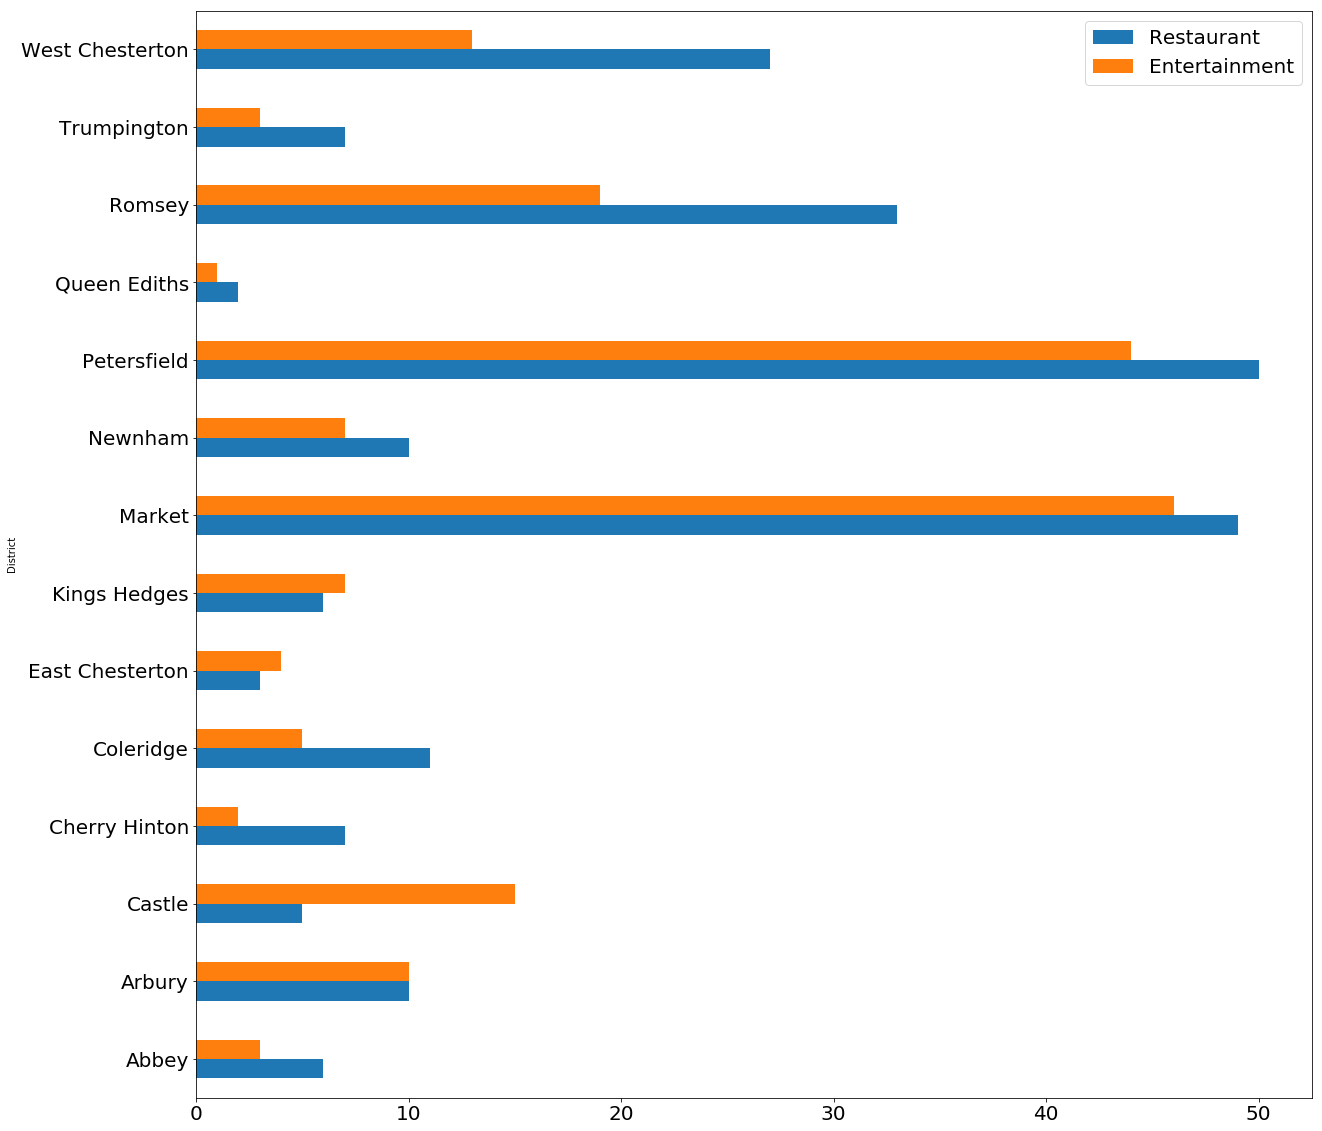

In [44]:
rest = np.array(df_rest_group['Venue'])
ent = np.array(df_ent_group['Venue'])
index = df_rest_group['District']

# Create horizontal barchart
df = pd.DataFrame({'Restaurant': rest,'Entertainment': ent}, index=index)
ax = df.plot.barh(figsize=(20,20))
ax.legend(loc=1, prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)

There is a clear correlation between entertainment venues and restaurants.

#### Create a scatter plot to show the correlation and Linear Regression

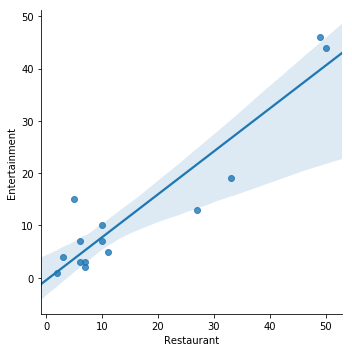

In [45]:
df_scatter = pd.merge(left=df_rest_group, right=df_ent_group, left_on='District', right_on='District')
df_scatter.drop(columns=['Venue Latitude_x','Venue Longitude_x','Venue Category_x','Venue Latitude_y','Venue Longitude_y','Venue Category_y'], inplace=True)
df_scatter.columns = ['District','Restaurant','Entertainment']

sns.lmplot(x="Restaurant", y="Entertainment", data=df_scatter)

### Cluster DBSCAN Scatter Plot - Using Latitude & Longitude

Firstly we will use a scatter plot to find the density of entertainment venues according to Latitude and Longitude.
This will help us to find the areas with the most venues. To display the clusters we will use the DBSCAN method.

Using a scatter plot we will show the density clusters of districts that are simiar to other districts with Latin American restaurants. We got this information from the K-Means clustering used to assign Districts into similar clusters using the restaurants and entertainment venues.
* Market
* Castle
* Newnham

##### FUNCTION - Create Scatter Plot Cluster

In [46]:
def create_scatter_cluster(x,y,title,x_label,y_label,cl,cm):
    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, c=cl, cmap=cm)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True, linewidth=0.5, alpha=0.5)
    plt.show()

#### DBSCAN Plot - Market District

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [48]:
# get the Latitude and Longitude
df_market = district_entertain_update[district_entertain_update['District'] == 'Market']

# Create arrays for Latitude and Longitude for Market
mkt_y = np.array(df_market['Venue Latitude'])
mkt_x = np.array(df_market['Venue Longitude'])

# Combine both arrays into one stacked array.
mkt_X = np.stack((mkt_x,mkt_y), axis=1)

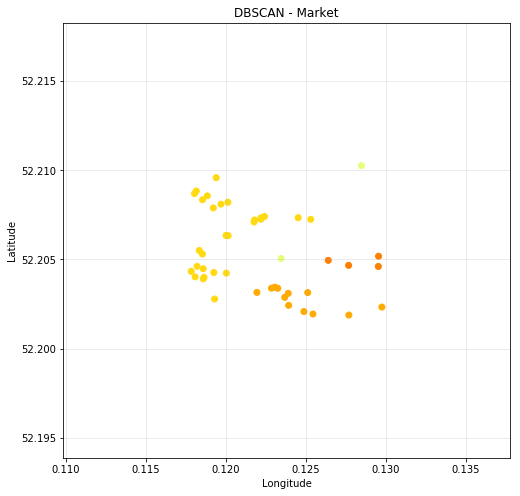

In [49]:
# Normalise the co-ordinates
mkt_scaler = StandardScaler()
mkt_X_scaled = mkt_scaler.fit_transform(mkt_X)

# Cluster using DBSCAN
mkt_clustering = DBSCAN(eps=0.7, min_samples=3)
mkt_clusters = mkt_clustering.fit_predict(mkt_X_scaled)

# Show plot of Market and DBSCAN
create_scatter_cluster(mkt_X[:,0],mkt_X[:,1],'DBSCAN - Market','Longitude','Latitude',mkt_clusters,'Wistia')

In [50]:
try:
    df_market['Scatter'] = mkt_clusters
except:
    df_market.drop(['Scatter'],inplace=True)
    df_market['Scatter'] = mkt_clusters

df_market.groupby('Scatter').count()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
Scatter,,,,,
-1,2,2,2,2,2
0,28,28,28,28,28
1,12,12,12,12,12
2,4,4,4,4,4


We can see from the scatter plot above that the most populous area in **Market** is **Scatter 0**.<br>
For this DBSCAN we had to reduce the eps value from 1 (as used on other DBSCAN's below), this was due to difference in proximity of locations in **Market**.<br>
In the next section we will use locations from **Scatter 0** to locate the perfect latitude and longitude for a restaurant in this area.

#### DBCAN Plot - Castle

In [51]:
# get the Latitude and Longitude
df_castle = district_entertain_update[district_entertain_update['District'] == 'Castle']

# Create arrays for Latitude and Longitude for Castle
cst_y = np.array(df_castle['Venue Latitude'])
cst_x = np.array(df_castle['Venue Longitude'])

# Combine both arrays into one stacked array.
cst_X = np.stack((cst_x,cst_y), axis=1)

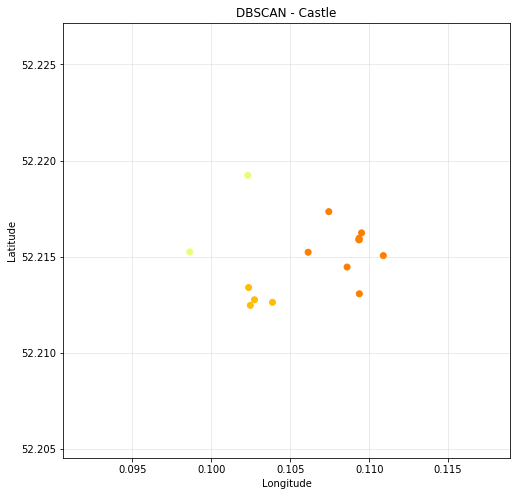

In [52]:
# Normalise the co-ordinates
cst_scaler = StandardScaler()
cst_X_scaled = cst_scaler.fit_transform(cst_X)

# Cluster using DBSCAN
cst_clustering = DBSCAN(eps=1, min_samples=3)
cst_clusters = cst_clustering.fit_predict(cst_X_scaled)

# Show plot of Market and DBSCAN
create_scatter_cluster(cst_X[:,0],cst_X[:,1],'DBSCAN - Castle','Longitude','Latitude',cst_clusters,'Wistia')

In [53]:
try:
    df_castle['Scatter'] = cst_clusters
except:
    df_castle.drop(['Scatter'],inplace=True)
    df_castle['Scatter'] = cst_clusters

df_castle.groupby('Scatter').count()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
Scatter,,,,,
-1,2,2,2,2,2
0,4,4,4,4,4
1,9,9,9,9,9


We can see from the scatter plot above that the most populous area in **Castle** is **Scatter 1**. In the next section we will use locations from **Scatter 1** to locate the perfect latitude and longitude for a restaurant in this area.

#### Scatter Plot - Newnham

In [54]:
# get the Latitude and Longitude
df_newnham = district_entertain_update[district_entertain_update['District'] == 'Newnham']

# Create arrays for Latitude and Longitude for Newnham
new_y = np.array(df_newnham['Venue Latitude'])
new_x = np.array(df_newnham['Venue Longitude'])

# Combine both arrays into one stacked array.
new_X = np.stack((new_x,new_y), axis=1)

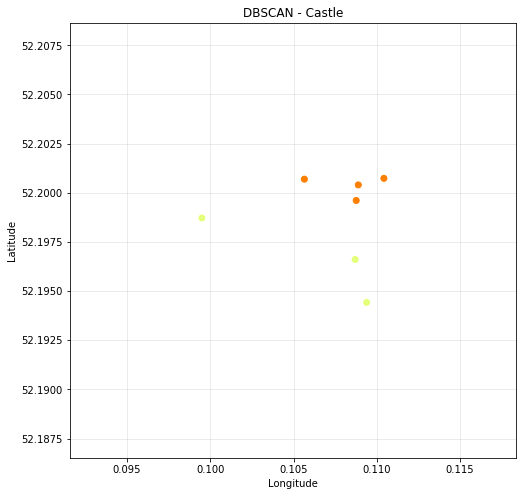

In [55]:
# Normalise the co-ordinates
new_scaler = StandardScaler()
new_X_scaled = new_scaler.fit_transform(new_X)

# Cluster using DBSCAN
new_clustering = DBSCAN(eps=1, min_samples=3)
new_clusters = new_clustering.fit_predict(new_X_scaled)

# Show plot of Market and DBSCAN
create_scatter_cluster(new_X[:,0],new_X[:,1],'DBSCAN - Castle','Longitude','Latitude',new_clusters,'Wistia')

In [56]:
try:
    df_newnham['Scatter'] = new_clusters
except:
    df_newnham.drop(['Scatter'],inplace=True)
    df_newnham['Scatter'] = new_clusters

df_newnham.groupby('Scatter').count()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,District,Venue,Venue Latitude,Venue Longitude,Venue Category
Scatter,,,,,
-1,3,3,3,3,3
0,4,4,4,4,4


We can see from the scatter plot above that the most populous area in **Newnham** is **Scatter 0**. In the next section we will use locations from **Scatter 0** to locate the perfect latitude and longitude for a restaurant in this area.

### Get Suitable Locations


From the **K-Means Clustering** of districts, we selected the following locations for further anaylsis:
* Market
* Castle
* Newnham

<p>Then we found the densest cluster of entertainment venues within these districts.
Now, using these clusters we aim to find a suitable location within each of these 3 districts to place the new restaurant.</p>

##### FUNCTION - Calculate Distance from Lat, Lng in Metres

In [117]:
# Imports from Math Library
from math import sin, cos, sqrt, atan2, radians, degrees, asin
# Import from geopy
import geopy
from geopy.distance import geodesic

In [87]:
def calculate_latlng_dist(lat1,lng1,lat2,lng2):
    
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lng1 = radians(lng1)
    lat2 = radians(lat2)
    lng2 = radians(lng2)
    
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlng / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    return distance

##### FUNCTION - Calculate the angle between two Lat, Lng points

In [134]:
def angleFromCoordinate(lat1,lng1,lat2,lng2):

    dlng = (lng2 - lng1)

    x = cos(lat2) * sin(dlng)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(dlng)

    brng = atan2(x,y);

    brng = degrees(brng)
    brng = (brng + 360) % 360
    brng = 360 - brng

    return brng

#### FUNCTION - Calculate distance from Lat, Lng point using bearing and distance

In [113]:
def distanceUsingBearing(b,d,lat1,lon1):
    origin = geopy.Point(lat1, lon1)
    destination = geodesic(kilometers=d).destination(origin, b)

    return destination.latitude, destination.longitude

##### FUNCTION - Create Final Map with markers

In [59]:
def CreateFinalMap(m,f_lat,f_lng,df):

    addLatin_toMap(m)
    
    for lat, lng, label, in zip(df['Venue Latitude'], df['Venue Longitude'], df['Venue']):
        location = np.array([lat,lng])
        # Add Marker
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='lightblue',
            fill_opacity=0.6
        ).add_to(m)
        
        folium.Marker([f_lat,f_lng], tooltip='Ideal Location').add_to(m)

##### Market 

When we performed the **DBSCAN** we found that **cluster 0** is the most populous with **28** entertainment venues.
Let's get the mean of the most popular cluster.

In [60]:
df_market_f = df_market[df_market['Scatter'] == 0]
print(df_market_f.shape)

(28, 6)


In [61]:
mkt_f_lat = df_market_f['Venue Latitude'].mean()
mkt_f_lng = df_market_f['Venue Longitude'].mean()
print('Lat:',mkt_f_lat,'Lng:',mkt_f_lng)

Lat: 52.20640387792996 Lng: 0.11990940205059276


Let's get the location of the **Market** area so that we can centre our map view.

In [62]:
df_market_pos = df_district[df_district['District'] == 'Market']
df_market_pos_lat = df_market_pos['Latitude']
df_market_pos_lng = df_market_pos['Longitude']

##### Castle 

When we performed the **DBSCAN** we found that **cluster 1** is the most populous with **9** entertainment venues.
Let's get the mean of the most popular cluster.

In [63]:
df_castle_f = df_castle[df_castle['Scatter'] == 0]
print(df_market_f.shape)

(28, 6)


In [64]:
cst_f_lat = df_castle_f['Venue Latitude'].mean()
cst_f_lng = df_castle_f['Venue Longitude'].mean()
print('Lat:',cst_f_lat,'Lng:',cst_f_lng)

Lat: 52.21281940030552 Lng: 0.102861808439892


Let's get the location of the **Castle** district so that we can centre our map view.

In [65]:
df_castle_pos = df_district[df_district['District'] == 'Castle']
df_castle_pos_lat = df_castle_pos['Latitude']
df_castle_pos_lng = df_castle_pos['Longitude']

##### Newnham 

When we performed the **DBSCAN** we found that **cluster 0** is the most populous with **4** entertainment venues.
Let's get the mean of the most popular cluster.

In [66]:
df_newnham_f = df_newnham[df_newnham['Scatter'] == 0]
print(df_newnham_f.shape)

(4, 6)


In [67]:
new_f_lat = df_newnham_f['Venue Latitude'].mean()
new_f_lng = df_newnham_f['Venue Longitude'].mean()
print('Lat:',new_f_lat,'Lng:',new_f_lng)

Lat: 52.2003564865187 Lng: 0.10842846644610948


Let's get the location of the **Newnham** district so that we can centre our map view.

In [68]:
df_newnham_pos = df_district[df_district['District'] == 'Newnham']
df_newnham_pos_lat = df_newnham_pos['Latitude']
df_newnham_pos_lng = df_newnham_pos['Longitude']

### District Maps - Market, Castle & Newnham

In these maps, we are shwoing:

* Latin American Restaurants with a **red** marker.
    * There is a **red** circle indicating a 500m radius from the restaurant.
    * Our recommended location cannot be situated within this radius.
* Entertainment venues from the most populous DBSCAN cluster within this district.
* **Blue** marker indicating the most suitable location

#### Map of Market

In [69]:
mar_f_map = folium.Map(location=[df_market_pos_lat, df_market_pos_lng], zoom_start=15,control_scale=True)  
CreateFinalMap(mar_f_map,mkt_f_lat,mkt_f_lng,df_market_f)
mar_f_map

As we can see, this location is within the **500m** radius of an existing **Latin American** restaurant.
Let's find out how far away it is, using the function we have created above.

In [89]:
for lat, lng in zip(district_latin_update['Venue Latitude'], district_latin_update['Venue Longitude']):
    print('Distance is: ',round(calculate_latlng_dist(lat,lng,mkt_f_lat,mkt_f_lng),2),'Km','Lat: ',lat,'Lng: ',lng)

Distance is:  0.46 Km Lat:  52.21022973296178 Lng:  0.1173092001522491
Distance is:  1.27 Km Lat:  52.200508 Lng:  0.135943
Distance is:  1.61 Km Lat:  52.208076 Lng:  0.14340329
Distance is:  1.96 Km Lat:  52.19763631707918 Lng:  0.14491176009346454
Distance is:  1.73 Km Lat:  52.20932828 Lng:  0.14487663


<p>The recommended point is 460m away from one of the restaurants.<br>
Let's extend the distance between the desired location and the Latin American restaurant.</p>
<p>First lets find the angle between the two points.</p>

In [154]:
la_lat = 52.21022973296178
la_lng = 0.1173092001522491

dif_angle = angleFromCoordinate(la_lat,la_lng,mkt_f_lat,mkt_f_lng)
print('Angle is: ',dif_angle,'°')
# round(dif_angle,2)

Angle is:  166.19184072422073 °


Now, lets use this angle (166.19°) to find 500m from the Latin American restaurant.

In [159]:
mar_n_f_lat, mar_n_f_lng = distanceUsingBearing((dif_angle),0.5,la_lat,la_lng)
print("Lat: ",mar_n_f_lat,"Lng: ",mar_n_f_lng)

Lat:  52.20586605989206 Lng:  0.11905483291775669


Finally, let's check the new latitude and longitude on the map.

In [160]:
mar_f_map = folium.Map(location=[df_market_pos_lat, df_market_pos_lng], zoom_start=15,control_scale=True)  
CreateFinalMap(mar_f_map,mar_n_f_lat,mar_n_f_lng,df_market_f)
mar_f_map

#### Map of Castle

In [71]:
cst_f_map = folium.Map(location=[df_castle_pos_lat, df_castle_pos_lng], zoom_start=15,control_scale=True)  
CreateFinalMap(cst_f_map,cst_f_lat,cst_f_lng,df_castle_f)
cst_f_map

#### Map of Newnham

In [161]:
new_f_map = folium.Map(location=[df_newnham_pos_lat, df_newnham_pos_lng], zoom_start=15,control_scale=True)  
CreateFinalMap(new_f_map,new_f_lat,new_f_lng,df_newnham_f)
new_f_map

#### Final Analysis

Now that we have the latitude and longitude points for the 3 districts that we chose to explore furhter, can we get an address from the lat and lng points?

#### FUNCTION - Return Address from Coordinates

In [172]:
from geopy.geocoders import Nominatim

def returnAddress(lat,lng):

    locStr = str(lat) + ',' + str(lng)
    geolocator = Nominatim(user_agent="My_app")
    location = geolocator.reverse(locStr)
    return location.address

In [174]:
returnAddress( mar_n_f_lat, mar_n_f_lng)

'North Shoes, 11, Rose Crescent, Newnham, Cambridge, Cambridgeshire, East of England, England, CB2 3LL, United Kingdom'

[Back to Contents](#contents)